In [9]:
import os, sys
import tensorflow as tf
import numpy as np
import cv2
from itertools import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import time
import Batch as batch
import EDM_Model as edm
import vgg.vgg19 as vgg

In [10]:
content_name = 'brad_pitt.jpg'
style_name = 'picasso_self_portrait.jpg'

model_path = "./2nd_Model/EDM_2200.ckpt"

content_path = './Data/Pred_Data/content/'
style_path = './Data/Pred_Data/style/'
output_path = "./Data/Pred_Data/output/"


In [11]:
#Data Load
content_path = os.path.join(content_path, content_name)
style_path = os.path.join(style_path, style_name)


content_img = cv2.resize(cv2.imread(content_path), (224,224))
b , g, r = cv2.split(content_img)
content_img = cv2.merge([r,g,b])
content_img = [content_img]
style_img = cv2.resize(cv2.imread(style_path), (224,224))
b , g, r = cv2.split(style_img)
style_img = cv2.merge([r,g,b])
style_img = [style_img]

In [12]:
learning_rate= 0.001
lambda_c = 1.
lambda_s = 5.
lambda_tv = 1e-5

config = tf.ConfigProto()
config.gpu_options.allocator_type ='BFC'
config.gpu_options.allow_growth=True

/media/cvml/1daccd7c-9160-4803-8edb-4f12e04e264f1/jeyoung/A_Unified_Framework_for_Generalizeable_Style_Transfer/vgg/vgg19.npy
npy file loaded
/media/cvml/1daccd7c-9160-4803-8edb-4f12e04e264f1/jeyoung/A_Unified_Framework_for_Generalizeable_Style_Transfer/vgg/vgg19.npy
npy file loaded
/media/cvml/1daccd7c-9160-4803-8edb-4f12e04e264f1/jeyoung/A_Unified_Framework_for_Generalizeable_Style_Transfer/vgg/vgg19.npy
npy file loaded
Model Build Strat..
build model started
build model finished: 2s
build model started
build model finished: 2s
build model started
build model finished: 2s
Model Build End..
Ending Time..  9.096204042434692 sec
INFO:tensorflow:Restoring parameters from ./2nd_Model/EDM_2200.ckpt


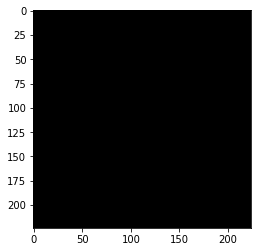

In [13]:
# Eval Start

tf.reset_default_graph()

with tf.Session(config=config) as sess:
    
    EDM = edm.Model(sess, lambda_c,lambda_s,lambda_tv, learning_rate)
    sess.run(tf.initialize_all_variables())
    sess.run(tf.local_variables_initializer())
    saver = tf.train.Saver()
    saver.restore(sess, model_path)
    
    
    output = EDM.predict(style_img, content_img)
    
    output = output[0].astype("uint8")
    fig, ax = plt.subplots()
    
    ax.imshow(output)
    
    plt.imsave(os.path.join(output_path,model_path.split("/")[1]+ model_path.split("/")[-1].replace('ckpt', 'jpg')),output)

In [14]:
np.shape(output)

(224, 224, 3)

In [15]:
model_path.split("/")[1]

'2nd_Model'

In [16]:
model_path.split("/")[0]+ model_path.split("/")[-1].replace('ckpt', 'jpg')

'.EDM_2200.jpg'